<a href="https://colab.research.google.com/github/ParsaHejabi/BSc-Thesis-Project/blob/main/JupyterNotebook/BScProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries and importing them

## Installation

In [ ]:
!pip install -qU transformers
!pip install -qU hazm
!pip install -qU clean-text[gpl]
!pip install -U spacy
!python -m spacy download en_core_web_sm

!pip install arabic-reshaper
!pip install python-bidi

     |████████████████████████████████| 1.8MB 18.5MB/s 
     |████████████████████████████████| 890kB 56.0MB/s 
     |████████████████████████████████| 2.9MB 57.0MB/s 
     |████████████████████████████████| 317kB 22.1MB/s 
     |████████████████████████████████| 1.4MB 55.0MB/s 
     |████████████████████████████████| 235kB 54.6MB/s 
     |████████████████████████████████| 133kB 20.6MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 245kB 46.0MB/s 
     |████████████████████████████████| 12.8MB 21.8MB/s 
     |████████████████████████████████| 1.1MB 52.4MB/s 
     |████████████████████████████████| 460kB 50.5MB/s 
     |████████████████████████████████| 9.2MB 44.9MB/s 
     |████████████████████████████████| 122kB 60.6MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=37e0df047d093c5fc841347f6f3a0dbef72aeea540d08874744996c07eaa935d
  

## Import

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import hazm
from cleantext import clean

import transformers 
from transformers import AutoTokenizer, AutoConfig
from transformers import TFAutoModelForTokenClassification

import os
import re
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout

print()
print('tensorflow', tf.__version__)
print('transformers', transformers.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
print()

if tf.test.gpu_device_name() != '/device:GPU:0':
  print()
  print('WARNING: GPU device not found.')
else:
  print()
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))


tensorflow 2.4.1
transformers 4.2.2
numpy 1.19.5
pandas 1.1.5


SUCCESS: Found GPU: /device:GPU:0


# Define clean method
Preprocessing consists of:

1.   `.strip()`: Leading and trailing whitespaces are removed
2.   `clean()` method from `cleantext` library:
  *   fix various unicode errors
  *   lowercase text
  *   fully strip line breaks as opposed to only normalizing them
  *   replace all URLs with empty string
  *   replace all email addresses with empty string
  *   replace all phone numbers with empty string
  *   replace all currency symbols with empty string
3.   `hazm` normalizer:
```
>>> normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')
'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'
```
4.   replace all emojis and emoticons and symbols with empty string
5.   removing all extra spaces and hashtags using `\s+` regex with empty string


In [ ]:
def cleaning(text):
  text = text.strip()
    
  # regular cleaning
  text = clean(text,
    fix_unicode=True,
    to_ascii=False,
    lower=True,
    no_line_breaks=True,
    no_urls=True,
    no_emails=True,
    no_phone_numbers=True,
    no_numbers=False,
    no_digits=False,
    no_currency_symbols=True,
    no_punct=False,
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_digit="0",
    replace_with_currency_symbol="",
  )
    
  # normalizing
  normalizer = hazm.Normalizer()
  text = normalizer.normalize(text)
    
  # removing wierd patterns
  wierd_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons from 😀 to 🙏
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u'\U00010000-\U0010ffff'
    u"\u200d" # ZERO WIDTH JOINER
    u"\u2640-\u2642" # ♀ - ♂
    u"\u2600-\u2B55" # ☀ - ⭕
    u"\u23cf" # EJECT SYMBOL
    u"\u23e9" # ⏩
    u"\u231a" # ⌚
    u"\u3030" # 〰
    u"\ufe0f"
    u"\u2069"
    u"\u2066"
    u"\u200c"
    u"\u2068"
    u"\u2067"
    "]+", flags=re.UNICODE)
    
  text = wierd_pattern.sub(r'', text)
    
  # removing extra spaces, hashtags
  text = re.sub("#", "", text)
  text = re.sub("\s+", " ", text)
    
  return text

# Load CSVs and data

In [ ]:
staff = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/Staff.csv')
staff['clean_full_name'] = staff['full_name'].apply(cleaning)
staff

,row,full_name,phone,title,clean_full_name
0,1,آقای یوسف برهانی,4129,مدیر اجرایی,آقای یوسف برهانی
1,2,خانم سمانه عیوض خانی,4093,مسول دفتر ریاست,خانم سمانه عیوض خانی
2,3,خانم نسترن صفوی,4130,کارمند گروه,خانم نسترن صفوی
3,4,خانم معصومه بهادر بیگی,4147,کارمند پژوهشی,خانم معصومه بهادر بیگی
4,5,خانم صدیقه مومنی,4155,کارمند کتابخانه,خانم صدیقه مومنی
5,6,خانم فاطمه زندی,4081,مسول آموزش,خانم فاطمه زندی
6,7,خانم نیلوفر اخوی,4082,کارمند آموزش,خانم نیلوفر اخوی
7,8,خانم مریم اصفهانی,4084,کارمند آموزش,خانم مریم اصفهانی
8,9,آقای غلامرضا اکبری,4084,کارمند آموزش,آقای غلامرضا اکبری
9,10,خانم ژاله ترهنده,4160,کارمند دبیرخانه و سایت,خانم ژاله ترهنده


In [ ]:
staff_names = ['عیوضخانی', 'بهادربیگی']

for staff_name in staff['clean_full_name']:
  staff_names.append(staff_name)
  staff_name_splitted = staff_name.split(maxsplit=1)
  staff_names.append(staff_name_splitted[1])
  staff_name_splitted = staff_name.split(maxsplit=2)
  staff_names.append(staff_name_splitted[2])
  staff_names.append(staff_name_splitted[0] + ' ' + staff_name_splitted[2])
print(staff_names)

['عیوضخانی', 'بهادربیگی', 'آقای یوسف برهانی', 'یوسف برهانی', 'برهانی', 'آقای برهانی', 'خانم سمانه عیوض خانی', 'سمانه عیوض خانی', 'عیوض خانی', 'خانم عیوض خانی', 'خانم نسترن صفوی', 'نسترن صفوی', 'صفوی', 'خانم صفوی', 'خانم معصومه بهادر بیگی', 'معصومه بهادر بیگی', 'بهادر بیگی', 'خانم بهادر بیگی', 'خانم صدیقه مومنی', 'صدیقه مومنی', 'مومنی', 'خانم مومنی', 'خانم فاطمه زندی', 'فاطمه زندی', 'زندی', 'خانم زندی', 'خانم نیلوفر اخوی', 'نیلوفر اخوی', 'اخوی', 'خانم اخوی', 'خانم مریم اصفهانی', 'مریم اصفهانی', 'اصفهانی', 'خانم اصفهانی', 'آقای غلامرضا اکبری', 'غلامرضا اکبری', 'اکبری', 'آقای اکبری', 'خانم ژاله ترهنده', 'ژاله ترهنده', 'ترهنده', 'خانم ترهنده']


In [ ]:
professors = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/Professors.csv')
professors['clean_full_name'] = professors['full_name'].apply(cleaning)
professors

,row,full_name,number,email,clean_full_name
0,1,محسن ابراهیمی مقدم,4194,m_moghadam@sbu.ac.ir,محسن ابراهیمی مقدم
1,2,احمدعلی آبین,4105,a_abin@sbu.ac.ir,احمدعلی آبین
2,3,قاسم جابری پور,4165,jaberipur@sbu.ac.ir,قاسم جابری پور
3,4,علی جهانیان,4188,jahanian@sbu.ac.ir,علی جهانیان
4,5,حسن حقیقی,4190,h_haghighi@sbu.ac.ir,حسن حقیقی
5,6,دارا رحمتی,4110,dara.rahmati@ipm.ir,دارا رحمتی
6,7,آرمین سلیمی,4192,arminsb@gmail.com\n,آرمین سلیمی
7,8,علیرضا شاملی سندی,4196,a_shameli@sbu.ac.ir,علیرضا شاملی سندی
8,9,یاسر شکفته,4105,y_shekofteh@sbu.ac.ir,یاسر شکفته
9,10,فریدون شمس علیئی,4164,f_shams@sbu.ac.ir,فریدون شمس علیئی


In [ ]:
professor_names = ['ابراهیمیمقدم', 'ابراهیمی', 'جابریپور', 'جابری', 'شاملیسندی', 'شاملی', 
                   'شمسعلیئی', 'شمس', 'شمسفرد', 'طالبپور', 'طباطباییملاذی', 'طباطبایی',
                   'طباطبائی', 'عطارزاده', 'عطار زاده', 'علیاکبری', 'قوامیزاده', 'قوامی',
                   'وحیدی', 'وحیدیاصل']
for professor_name in professors['clean_full_name']:
  professor_names.append(professor_name)
  professor_name_splitted = professor_name.split(maxsplit=1)
  professor_names.append(professor_name_splitted[1])

print(professor_names)

['ابراهیمیمقدم', 'ابراهیمی', 'جابریپور', 'جابری', 'شاملیسندی', 'شاملی', 'شمسعلیئی', 'شمس', 'شمسفرد', 'طالبپور', 'طباطباییملاذی', 'طباطبایی', 'طباطبائی', 'عطارزاده', 'عطار زاده', 'علیاکبری', 'قوامیزاده', 'قوامی', 'وحیدی', 'وحیدیاصل', 'محسن ابراهیمی مقدم', 'ابراهیمی مقدم', 'احمدعلی آبین', 'آبین', 'قاسم جابری پور', 'جابری پور', 'علی جهانیان', 'جهانیان', 'حسن حقیقی', 'حقیقی', 'دارا رحمتی', 'رحمتی', 'آرمین سلیمی', 'سلیمی', 'علیرضا شاملی سندی', 'شاملی سندی', 'یاسر شکفته', 'شکفته', 'فریدون شمس علیئی', 'شمس علیئی', 'مهرنوش شمس فرد', 'شمس فرد', 'فرشاد صفایی', 'صفایی', 'علیرضا طالب پور', 'طالب پور', 'هادی طباطبایی ملاذی', 'طباطبایی ملاذی', 'مقصود عباسپور', 'عباسپور', 'منیره عبدوس', 'عبدوس', 'حسین عطارزاده نیاکی', 'عطارزاده نیاکی', 'صادق علی اکبری', 'علی اکبری', 'رامک قوامی زاده', 'قوامی زاده', 'حامد ملک', 'ملک', 'حمید رضا مهدیانی', 'رضا مهدیانی', 'اسلام ناظمی', 'ناظمی', 'کیوان ناوی', 'ناوی', 'محمود نشاطی', 'نشاطی', 'مجتبی وحیدی اصل', 'وحیدی اصل']


In [ ]:
bachelors102 = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/Bachelors102.csv', usecols=['course_name'])
bachelors102.dropna(inplace=True)

alternative_course_names = np.array(['ریضمو', 'الگو', 'dsd', 'مدیریت فناوری اطلاعات', 'دیپ لرنینگ', 'دیپ', 'هوش مصنوعی', 'نظریه زبان', 'نظریه زبان‌ها'])
for course in bachelors102['course_name']:
  if 'ها' in course and 'های' not in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('ها', ''))

  if 'آزمایشگاه' in course and 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
    new_course = course.replace('آزمایشگاه', 'آز')
    new_course = new_course.replace('های', '')
    alternative_course_names = np.append(alternative_course_names, new_course)
  elif 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
  elif 'آزمایشگاه' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
  
alternative_course_names = np.unique(alternative_course_names)
for idx, course in enumerate(alternative_course_names):
  alternative_course_names[idx] = cleaning(course)

bachelors102['clean_course_name'] = bachelors102['course_name'].apply(cleaning)
bachelors102 = bachelors102['clean_course_name'].unique()
bachelors102 = np.append(bachelors102, alternative_course_names)
bachelors102

array(['کاربرد علوم کامپیوتر و نرم افزارها', 'برنامه نویسی کامپیوتر',
       'مبانی کامپیوتر', 'کارآموزی', 'برنامه سازی پیشرفته',
       'زبانهای ماشین و اسمبلی', 'ساختمانهای گسسته', 'ساختمان دادهها',
       'معماری کامپیوتر', 'کاربرد رایانه', 'نظریه زبانها و ماشینها',
       'شبکههای کامپیوتری', 'فناوری اطلاعات در روانشناسی',
       'آزمایشگاه معماری کامپیوتر', 'آزمایشگاه مدارهای منطقی',
       'کاربرد کامپیوتر در تجزیه و تحلیل آماری', 'طراحی الگوریتمها',
       'مدارهای منطقی', 'کارگاه کامپیوتر', 'زبان تخصصی',
       'مبانی کامپیوتر و برنامه سازی', 'ریزپردازنده ۱',
       'آزمایشگاه ریزپردازنده ۱', 'کاربرد کامپیوتر در شهرسازی',
       'آزمایشگاه شبکههای کامپیوتری', 'ریاضیات گسسته',
       'روش پژوهش و ارائه', 'سیستمهای عامل',
       'طراحی کامپیوتری سیستمهای دیجیتال', 'ریز پردازنده و زبان اسمبلی',
       'هوش مصنوعی و سیستمهای خبره', 'اصول طراحی کامپایلر',
       'آزمایشگاه سیستمهای عامل',
       'آزمایشگاه مدارهای منطقی و معماری کامپیوتر',
       'آزمایشگاه ریزپردازنده', 'مدارهای ال

In [ ]:
bachelors578 = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/Bachelors578.csv', usecols=['Unnamed: 15'])
bachelors578.rename(columns={'Unnamed: 15': 'course_name'}, inplace=True)
bachelors578.dropna(inplace=True)
bachelors578 = bachelors578[~bachelors578['course_name'].str.contains('نام درس')]
bachelors578 = bachelors578[~bachelors578['course_name'].str.contains('نوع درس گروه')]

alternative_course_names = np.array([])
for course in bachelors578['course_name']:
  if 'ها' in course and 'های' not in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('ها', ''))

  if 'آزمایشگاه' in course and 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
    new_course = course.replace('آزمایشگاه', 'آز')
    new_course = new_course.replace('های', '')
    alternative_course_names = np.append(alternative_course_names, new_course)
  elif 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
  elif 'آزمایشگاه' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
  
alternative_course_names = np.unique(alternative_course_names)
for idx, course in enumerate(alternative_course_names):
  alternative_course_names[idx] = cleaning(course)

bachelors578['clean_course_name'] = bachelors578['course_name'].apply(cleaning)
bachelors578 = bachelors578['clean_course_name'].unique()
bachelors578 = np.append(bachelors578, alternative_course_names)
bachelors578

array(['دانش خانواده و جمعیت', 'فارسی', 'زبان خارجی', 'معارف اسلامی ۱',
       'معارف اسلامی ۲', 'تاریخ اسلام',
       'انقلاب اسلامی و ریشههای آن از قرن سیزدهم', 'اخلاق وتربیت اسلامی',
       'متون اسلامی *آموزش زبان عربی*', 'تربیت بدنی ۱', 'تربیت بدنی ۲',
       'آمار و احتمالات مهندسی', 'کارگاه عمومی', 'ریاضیات عمومی ۲',
       'ریاضیات عمومی ۱', 'فیزیک ۱', 'آزمایشگاه فیزیک ۱', 'فیزیک ۲',
       'آزمایشگاه فیزیک ۲', 'معادلات دیفرانسیل', 'کارآموزی',
       'ریاضی مهندسی', 'برنامه سازی پیشرفته', 'زبانهای ماشین و اسمبلی',
       'ساختمانهای گسسته', 'ساختمان دادهها', 'معماری کامپیوتر',
       'سیستمهای عامل', 'نظریه زبانها و ماشینها', 'شبکههای کامپیوتری',
       'روش پژوهش و ارائه', 'آزمایشگاه معماری کامپیوتر',
       'آزمایشگاه مدارهای منطقی', 'طراحی زبانهای برنامه سازی',
       'طراحی الگوریتمها', 'مدارهای منطقی', 'کارگاه کامپیوتر',
       'زبان تخصصی', 'مبانی کامپیوتر و برنامه سازی', 'ریزپردازنده ۱',
       'آزمایشگاه ریزپردازنده ۱', 'مدارهای الکتریکی ۱',
       'آزمایشگاه مدارهای ال

In [ ]:
grad102 = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/Grad102.csv', usecols=['course_name'])
grad102.dropna(inplace=True)

alternative_course_names = np.array(['nlp', 'داده کاوی', 'هوش‌مصنوعی', 'طراحی الگوریتم‌ها', 'پایان‌نامه'])
for course in grad102['course_name']:
  if 'ها' in course and 'های' not in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('ها', ''))

  if 'آزمایشگاه' in course and 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
    new_course = course.replace('آزمایشگاه', 'آز')
    new_course = new_course.replace('های', '')
    alternative_course_names = np.append(alternative_course_names, new_course)
  elif 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
  elif 'آزمایشگاه' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
  
alternative_course_names = np.unique(alternative_course_names)
for idx, course in enumerate(alternative_course_names):
  alternative_course_names[idx] = cleaning(course)

grad102['clean_course_name'] = grad102['course_name'].apply(cleaning)
grad102 = grad102['clean_course_name'].unique()
grad102 = np.append(grad102, alternative_course_names)
grad102

array(['مبانی کامپیوتر', 'کاربرد کامپیوتر در شهرسازی', 'گرافیک کامپیوتری',
       'شبکههای کامپیوتری', 'ج محاسباتی م مجتمع پرتراکم',
       'معماری کامپیوترهای پردازش سیگنال', 'حساب کامپیوتری پیشرفته',
       'آنالیز و مدلسازی با vhdl', 'ریاضیات پیشرفته در مهندسی کامپیوتر',
       'طراحی مدارهای پرتراکم پیشرفته', 'معماری کامپیوتر',
       'ساختمان دادهها و الگوریتمها', 'نظریه زبانها و ماشینها',
       'مدل سازی و ارزیابی سیستمهای کامپیوتری', 'سیستم عامل ۱',
       'سیستمهای اطلاعاتی بزرگ', 'پردازش تصاویر دیجیتالی',
       'الکترونیک دیجیتال', 'اصول و طراحی پایگاه دادهها',
       'مباحث ویژه درم کامپیوتر (شبکههای عصبی)', 'شبکه میان ارتباطی',
       'م ویژه در م کامپیوتر (تئوری رمز اطلاعات)',
       'پایگاه دادههای نامتمرکز',
       'مباحث ویژه (مهندسی دانش و هستان شناسی)', 'تولید برنامه ساختی',
       'تکنولوژی معنایی', 'جنبههای محاسباتی مدارهای پر تراکم پیشرفته',
       'تحلیل و طراحی الگوریتمهای پیشرفته', 'پایگاه داده توزیع شده',
       'مباحث ویژه در مهندسی کامپیوتر',
       'مباحث و

In [ ]:
grad578 = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/Grad578.csv', usecols=['Unnamed: 15'])
grad578.rename(columns={'Unnamed: 15': 'course_name'}, inplace=True)
grad578.dropna(inplace=True)
grad578 = grad578[~grad578['course_name'].str.contains('نام درس')]
grad578 = grad578[~grad578['course_name'].str.contains('نوع درس گروه')]

alternative_course_names = np.array([])
for course in grad578['course_name']:
  if 'ها' in course and 'های' not in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('ها', ''))

  if 'آزمایشگاه' in course and 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
    new_course = course.replace('آزمایشگاه', 'آز')
    new_course = new_course.replace('های', '')
    alternative_course_names = np.append(alternative_course_names, new_course)
  elif 'های' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('های', ''))
  elif 'آزمایشگاه' in course:
    alternative_course_names = np.append(alternative_course_names, course.replace('آزمایشگاه', 'آز'))
  
alternative_course_names = np.unique(alternative_course_names)
for idx, course in enumerate(alternative_course_names):
  alternative_course_names[idx] = cleaning(course)

grad578['clean_course_name'] = grad578['course_name'].apply(cleaning)
grad578 = grad578['clean_course_name'].unique()
grad578 = np.append(grad578, alternative_course_names)
grad578

array(['معماری کامپیوتر پیشرفته', 'شبکههای کامپیوتری پیشرفته',
       'سیستمهای عامل پیشرفته', 'vlsi پیشرفته',
       'آزمون و طراحی آزمون پذیر', 'طراحی سیستمهای مطمئن',
       'ریاضیات مهندسی پیشرفته', 'پردازندههای حسابی',
       'سنتز سیستمهای دیجیتال', 'ارزیابی کارایی شبکه',
       'طراحی ریزپردازندههای ویژه', 'الگوریتمهای طراحی مدارهای پرتراکم',
       'پردازش تصاویر رقمی', 'پردازش سیگنالهای رقمی',
       'تئوری رمز کردن اطلاعات', 'مباحث پیشرفته در مهندسی کامپیوتر',
       'سمینار', 'پایان نامه', 'مدلسازی سخت افزار و متدهای طراحی آن',
       'مباحث ویژه (حسابگری زیستی)', 'امنیت سخت افزار و طراحی امن',
       'سامانههای حسگر هوشمند', 'طراحی الگوریتمها', 'اصول طراحی کامپایلر',
       'هوش مصنوعی و سیستمهای خبره', 'پردازش تکاملی', 'رباتیک',
       'سیستمهای فازی', 'شبکههای عصبی', 'شناسایی آماری الگو',
       'مهندسی دانش و هستان شناسی', 'یادگیری ماشین',
       'بازیابی پیشرفته اطلاعات', 'بینایی ماشین', 'پردازش تصویر',
       'پردازش زبانهای طبیعی', 'پردازش سیگنالهای صحبت', 'سنجش از را

In [ ]:
degrees = ['کاردانی', 'کاردانی پیوسته', 'کاردانی ناپیوسته',
           'کارشناسی', 'کارشناسی پیوسته', 'کارشناسی ناپیوسته', 'لیسانس',
           'کارشناسی ارشد', 'کارشناسی ارشد پیوسته', 'کارشناسی ارشد ناپیوسته', 'ارشد',
           'دکتری', 'دکترای حرفه‌ای', 'دکترای حرفه ای', 'دکترای تخصصی']

degrees = [cleaning(text) for text in degrees]
degrees

['کاردانی',
 'کاردانی پیوسته',
 'کاردانی ناپیوسته',
 'کارشناسی',
 'کارشناسی پیوسته',
 'کارشناسی ناپیوسته',
 'لیسانس',
 'کارشناسی ارشد',
 'کارشناسی ارشد پیوسته',
 'کارشناسی ارشد ناپیوسته',
 'ارشد',
 'دکتری',
 'دکترای حرفهای',
 'دکترای حرفهای',
 'دکترای تخصصی']

In [ ]:
majors = ['مهندسی کامپیوتر', 'علوم کامپیوتر', 'کامپیوتر',
          'مهندسی برق', 'برق']

majors = [cleaning(text) for text in majors]
majors

['مهندسی کامپیوتر', 'علوم کامپیوتر', 'کامپیوتر', 'مهندسی برق', 'برق']

In [ ]:
orientations = ['هوش مصنوعی، رباتیک و رایانش شناختی', 'هوش', 'هوش مصنوعی', 'رباتیک',
                'معماری کامپیوتر و شبکه', 'معماری', 'معماری کامپیوتر', 'شبکه',
                'نرمافزار و سیستمهای اطلاعاتی', 'نرم افزار', 'نرمافزار',
                'سخت‌افزار', 'سخت افزار']

qa_server_orientations = ['مهندسی نرم افزار', 'مهندسی نرم‌افزار', 'هوش مصنوعی و رباتیکز',
                          'معماری کامپیوتر', 'فناوری اطلاعات', 'مهندسی برق قدرت', 'برق قدرت',
                          'مهندسی برق مخابرات', 'برق مخابرات', 'مهندسی برق الکترونیک',
                          'برق الکترونیک', 'مهندسی برق سیستم و میدان', 'برق سیستم و میدان',
                          'گروه شبکه‌های کامپیوتری و امنیت']

orientations.extend(qa_server_orientations)

orientations = [cleaning(text) for text in orientations]
orientations

['هوش مصنوعی، رباتیک و رایانش شناختی',
 'هوش',
 'هوش مصنوعی',
 'رباتیک',
 'معماری کامپیوتر و شبکه',
 'معماری',
 'معماری کامپیوتر',
 'شبکه',
 'نرمافزار و سیستمهای اطلاعاتی',
 'نرم افزار',
 'نرمافزار',
 'سختافزار',
 'سخت افزار',
 'مهندسی نرم افزار',
 'مهندسی نرمافزار',
 'هوش مصنوعی و رباتیکز',
 'معماری کامپیوتر',
 'فناوری اطلاعات',
 'مهندسی برق قدرت',
 'برق قدرت',
 'مهندسی برق مخابرات',
 'برق مخابرات',
 'مهندسی برق الکترونیک',
 'برق الکترونیک',
 'مهندسی برق سیستم و میدان',
 'برق سیستم و میدان',
 'گروه شبکههای کامپیوتری و امنیت']

# Make sample text to test

In [ ]:
sample_text = 'من دانشجوی ارشد هوش مصنوعی ورودی سال ۱۳۹۸، به شماره دانشجوی ۹۸۴۴۳۱۳۷ هستم و درخواست حذف تک درس شناسایی الگو را دارم.'
sample_text = cleaning(sample_text)
print(sample_text)

من دانشجوی ارشد هوش مصنوعی ورودی سال ۱۳۹۸، به شماره دانشجوی ۹۸۴۴۳۱۳۷ هستم و درخواست حذف تک درس شناسایی الگو را دارم.


# Extract by spaCy and Rules

## Import space `Matcher` and `PhraseMatcher`

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.matcher import Matcher

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

## Test `PhraseMatcher` with `sample_text`

In [ ]:
matcher = PhraseMatcher(nlp.vocab)
doc = nlp(sample_text)

staff_names_patterns = [nlp.make_doc(text) for text in staff_names]
matcher.add("StaffList", staff_names_patterns)

staff_names_matches = matcher(doc)
for match_id, start, end in staff_names_matches:
  span = doc[start:end]
  print(span.text)

matcher.remove("StaffList")
print()

professor_names_patterns = [nlp.make_doc(text) for text in professor_names]
matcher.add("ProfessorsList", professor_names_patterns)

professor_names_matches = matcher(doc)
for match_id, start, end in professor_names_matches:
  span = doc[start:end]
  print(span.text)

matcher.remove("ProfessorsList")
print()

course_names_patterns = [nlp.make_doc(text) for text in bachelors102.tolist() + bachelors578.tolist() + grad102.tolist() + grad578.tolist()]
matcher.add("CourseList", course_names_patterns)

course_names_matches = matcher(doc)
for match_id, start, end in course_names_matches:
  span = doc[start:end]
  print(span.text)

matcher.remove("CourseList")
print()

degree_names_patterns = [nlp.make_doc(text) for text in degrees]
matcher.add("DegreesList", degree_names_patterns)

degree_names_matches = matcher(doc)
for match_id, start, end in degree_names_matches:
  span = doc[start:end]
  print(span.text)

matcher.remove("DegreesList")
print()

major_names_patterns = [nlp.make_doc(text) for text in majors]
matcher.add("MajorsList", major_names_patterns)

major_names_matches = matcher(doc)
for match_id, start, end in major_names_matches:
  span = doc[start:end]
  print(span.text)

matcher.remove("MajorsList")
print()

orientation_names_patterns = [nlp.make_doc(text) for text in orientations]
matcher.add("OrientationsList", orientation_names_patterns)

orientation_names_matches = matcher(doc)
for match_id, start, end in orientation_names_matches:
  span = doc[start:end]
  print(span.text)

matcher.remove("OrientationsList")
print()

خانم اصفهانی
اصفهانی

شمس
شمس فرد

پردازش زبانهای طبیعی

کارشناسی

مهندسی کامپیوتر
کامپیوتر

نرمافزار



## Test `Matcher` with `sample_text`

In [ ]:
matcher = Matcher(nlp.vocab)
doc = nlp(sample_text)

student_id_pattern = r"((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{7}\b"
for match in re.finditer(student_id_pattern, doc.text):
    start, end = match.span()
    span = doc.char_span(start, end)
    # This is a Span object or None if match doesn't map to valid token sequence
    if span is not None:
        print("Student ID match:", span.text)

entry_year_pattern = r"(13|\u06F1\u06F3){0,1}((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}\b"
for match in re.finditer(entry_year_pattern, doc.text):
    start, end = match.span()
    span = doc.char_span(start, end)

    if span is not None:
        print("Entry year match:", span.text)

Student ID match: ۹۵۲۴۳۰۱۹
Entry year match: ۹۵


### High confidence regex for student ID

In [ ]:
student_id_pattern_high_confidence = r"شماره(‌|\s|ی\s| ی\s| ی\s|‌ی\s){0,1}دانشجویی(م){0,1}(:){0,1}\s((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{7}\b"
print(re.match(student_id_pattern_high_confidence, 'شماره‌دانشجویی ۹۰۸۰۷۰۶۰'))
print(re.match(student_id_pattern_high_confidence, 'شماره‌دانشجوییم: ۹۰۸۰۷۰۶۰'))

<_sre.SRE_Match object; span=(0, 23), match='شماره\u200cدانشجویی ۹۰۸۰۷۰۶۰'>
<_sre.SRE_Match object; span=(0, 25), match='شماره\u200cدانشجوییم: ۹۰۸۰۷۰۶۰'>


### High confidence regex for entry year

*   ورودی ۹۵
*   ورودی‌۹۵
*   ورودی سال ۹۵
*   ورودی سال‌۹۵
*   ورودی ۱۳۹۵
*   ورودی سال ۱۳۹۵
*   ورودی ۹۵-۹۶ (NOT ACCEPTED)
*   ورودی 95
*   ورودی 1395



In [ ]:
entry_year_pattern_high_confidence = r"ورودی(‌|\s)(سال(‌|\s)){0,1}(13|\u06F1\u06F3){0,1}((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}\b"
print(re.match(entry_year_pattern_high_confidence, 'ورودی ۹۵'))
print(re.match(entry_year_pattern_high_confidence, 'ورودی‌سال‌1395'))
print(re.match(entry_year_pattern_high_confidence, 'ورودی ۹۵-۹۶'))

<_sre.SRE_Match object; span=(0, 8), match='ورودی ۹۵'>
<_sre.SRE_Match object; span=(0, 14), match='ورودی\u200cسال\u200c1395'>
<_sre.SRE_Match object; span=(0, 8), match='ورودی ۹۵'>


### High confidence regex for GPA

*    معدل ۱۷
*    معدل ۱۷.۴۰
*    معدلم ۱۷.۴۰
*    معدل ۱۲.۰
*    ۱۷.۴۰
*    معدل 17.40
*    ۲۰

In [ ]:
gpa_pattern_high_confidence = r"(معدل(م)?(‌| )?)?((1|\u06F1)([\u06F2-\u06F9]|[2-9]){1}|(20|۲۰))((.|,)([\u06F0-\u06F9]|[0-9]){1,2})?\b"
print(re.match(gpa_pattern_high_confidence, 'معدل ۱۷'))
print(re.match(gpa_pattern_high_confidence, 'معدل‌۱۷'))
print(re.match(gpa_pattern_high_confidence, '۱۷'))
print(re.match(gpa_pattern_high_confidence, '۱۰'))
print(re.match(gpa_pattern_high_confidence, 'معدلم ۱۷.۲۰ هستش'))

<_sre.SRE_Match object; span=(0, 7), match='معدل ۱۷'>
<_sre.SRE_Match object; span=(0, 7), match='معدل\u200c۱۷'>
<_sre.SRE_Match object; span=(0, 2), match='۱۷'>
None
<_sre.SRE_Match object; span=(0, 11), match='معدلم ۱۷.۲۰'>


### High confidence regex for requested period


*   نیمسال اول ۹۷-۹۸
*   نیمسال دوم ۹۷-۹۸
*   پاییز ۹۸
*   بهار ۹۷
*   نیمسال اول ۱۳۹۷-۱۳۹۸
*   نیمسال دوم ۱۳۹۷-۱۳۹۸



In [ ]:
requested_period_high_confidence = r"((نیم)(‌| )?(سال)(‌| )(اول|دوم)(‌| )((سال)(‌| )(تحصیلی(‌| )?)?)?(13|\u06F1\u06F3)?((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}-(13|\u06F1\u06F3)?((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}|(پاییز|بهار)(‌|\s)(13|\u06F1\u06F3)?((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1})\b"
print(re.match(requested_period_high_confidence, 'نیمسال اول ۹۷-۹۸'))
print(re.match(requested_period_high_confidence, 'نیمسال اول سال تحصیلی ۹۷-۹۸'))

<_sre.SRE_Match object; span=(0, 16), match='نیمسال اول ۹۷-۹۸'>
<_sre.SRE_Match object; span=(0, 27), match='نیمسال اول سال تحصیلی ۹۷-۹۸'>


# Preparing data

In [ ]:
user_requests = pd.read_csv('./drive/MyDrive/B.Sc.ProjectFiles/approved_user_requests_extended.csv')
user_requests.head()

,text,clean_text,request_type,second_approved,IOB_tag
0,من نغمه مرادی به شماره دانشجویی 99999999 دانشج...,من نغمه مرادی به شماره دانشجویی ۹۹۹۹۹۹۹۹ دانشج...,حذف درس (حذف تک درس یا حذف پزشکی),True,نغمه B-student_name\nمرادی I-student_name\n۹۹۹...
1,چرا برای عدم مهاجرت دانشجویان و نخبه های کشور ...,چرا برای عدم مهاجرت دانشجویان و نخبههای کشور ه...,NaN,NaN,NaN
2,سلام\nلطفا انتخاب واحد اینجانب را تایید بفرمایید.,سلام لطفا انتخاب واحد اینجانب را تایید بفرمایید.,تایید انتخاب واحد,True,NaN
3,سلام خسته نباشید.\nببخشید راهی هست که محدودیت ...,سلام خسته نباشید. ببخشید راهی هست که محدودیت ک...,بهبود امکانات یا برنامه های دانشکده,True,NaN
4,سلام خانم دکتر روزتون بخیر. \nببخشید ما امتحان...,سلام خانم دکتر روزتون بخیر. ببخشید ما امتحانها...,تغییر زمان امتحان,True,NaN


## Dropping unused columns and making `id` for `request_type` column

In [ ]:
request_types = ['بهبود امکانات یا برنامههای دانشکده', 'اخذ درس', 'افزایش ظرفیت درس', 'حذف ترم',
                 'حذف درس (حذف تک درس یا حذف پزشکی)', 'معرفی به استاد',
                 'مرخصی یا وقفه تحصیلی', 'بازگشت به تحصیل', 'درخواست آموزش محور شدن',
                 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، ...)',
                 'بهبود امکانات یا برنامه های دانشکده',
                 'سایر موارد (آزاد)']

In [ ]:
approved_user_requests = user_requests.loc[user_requests['second_approved'] == True]
approved_user_requests.drop(columns=['second_approved'], inplace=True)
approved_user_requests.loc[~approved_user_requests.request_type.isin(request_types), 'request_type'] = 'سایر موارد (آزاد)'
approved_user_requests['request_type'] = approved_user_requests['request_type'].apply(cleaning)
approved_user_requests['request_type_id'] = approved_user_requests['request_type'].factorize()[0]
approved_user_requests['IOB_tag'] = approved_user_requests['IOB_tag'].replace(np.nan, '', regex=True)
approved_user_requests.reset_index(inplace=True)
approved_user_requests.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

,index,text,clean_text,request_type,IOB_tag,request_type_id
0,0,من نغمه مرادی به شماره دانشجویی 99999999 دانشج...,من نغمه مرادی به شماره دانشجویی ۹۹۹۹۹۹۹۹ دانشج...,حذف درس (حذف تک درس یا حذف پزشکی),نغمه B-student_name\nمرادی I-student_name\n۹۹۹...,0
1,2,سلام\nلطفا انتخاب واحد اینجانب را تایید بفرمایید.,سلام لطفا انتخاب واحد اینجانب را تایید بفرمایید.,سایر موارد (آزاد),,1
2,3,سلام خسته نباشید.\nببخشید راهی هست که محدودیت ...,سلام خسته نباشید. ببخشید راهی هست که محدودیت ک...,بهبود امکانات یا برنامههای دانشکده,,2
3,4,سلام خانم دکتر روزتون بخیر. \nببخشید ما امتحان...,سلام خانم دکتر روزتون بخیر. ببخشید ما امتحانها...,سایر موارد (آزاد),,1
4,6,سلام روزتون بخیر.\nمیخواستم ببینم امکانش هست ا...,سلام روزتون بخیر. میخواستم ببینم امکانش هست ای...,بهبود امکانات یا برنامههای دانشکده,,2


In [ ]:
approved_user_requests
print(approved_user_requests['request_type'].unique())

assert len(approved_user_requests['request_type'].unique()) == 11

['حذف درس (حذف تک درس یا حذف پزشکی)' 'سایر موارد (آزاد)'
 'بهبود امکانات یا برنامههای دانشکده'
 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)'
 'مرخصی یا وقفه تحصیلی' 'حذف ترم' 'افزایش ظرفیت درس' 'اخذ درس'
 'معرفی به استاد' 'درخواست آموزش محور شدن' 'بازگشت به تحصیل']


## Creating `label2id` and `id2label` dictionaries

In [ ]:
label2id = {label: i for i, label in enumerate(approved_user_requests['request_type'].unique())}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'حذف درس (حذف تک درس یا حذف پزشکی)': 0, 'سایر موارد (آزاد)': 1, 'بهبود امکانات یا برنامههای دانشکده': 2, 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)': 3, 'مرخصی یا وقفه تحصیلی': 4, 'حذف ترم': 5, 'افزایش ظرفیت درس': 6, 'اخذ درس': 7, 'معرفی به استاد': 8, 'درخواست آموزش محور شدن': 9, 'بازگشت به تحصیل': 10}
id2label: {0: 'حذف درس (حذف تک درس یا حذف پزشکی)', 1: 'سایر موارد (آزاد)', 2: 'بهبود امکانات یا برنامههای دانشکده', 3: 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)', 4: 'مرخصی یا وقفه تحصیلی', 5: 'حذف ترم', 6: 'افزایش ظرفیت درس', 7: 'اخذ درس', 8: 'معرفی به استاد', 9: 'درخواست آموزش محور شدن', 10: 'بازگشت به تحصیل'}


## Visualize data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from bidi.algorithm import get_display
from arabic_reshaper import reshape

<BarContainer object of 11 artists>

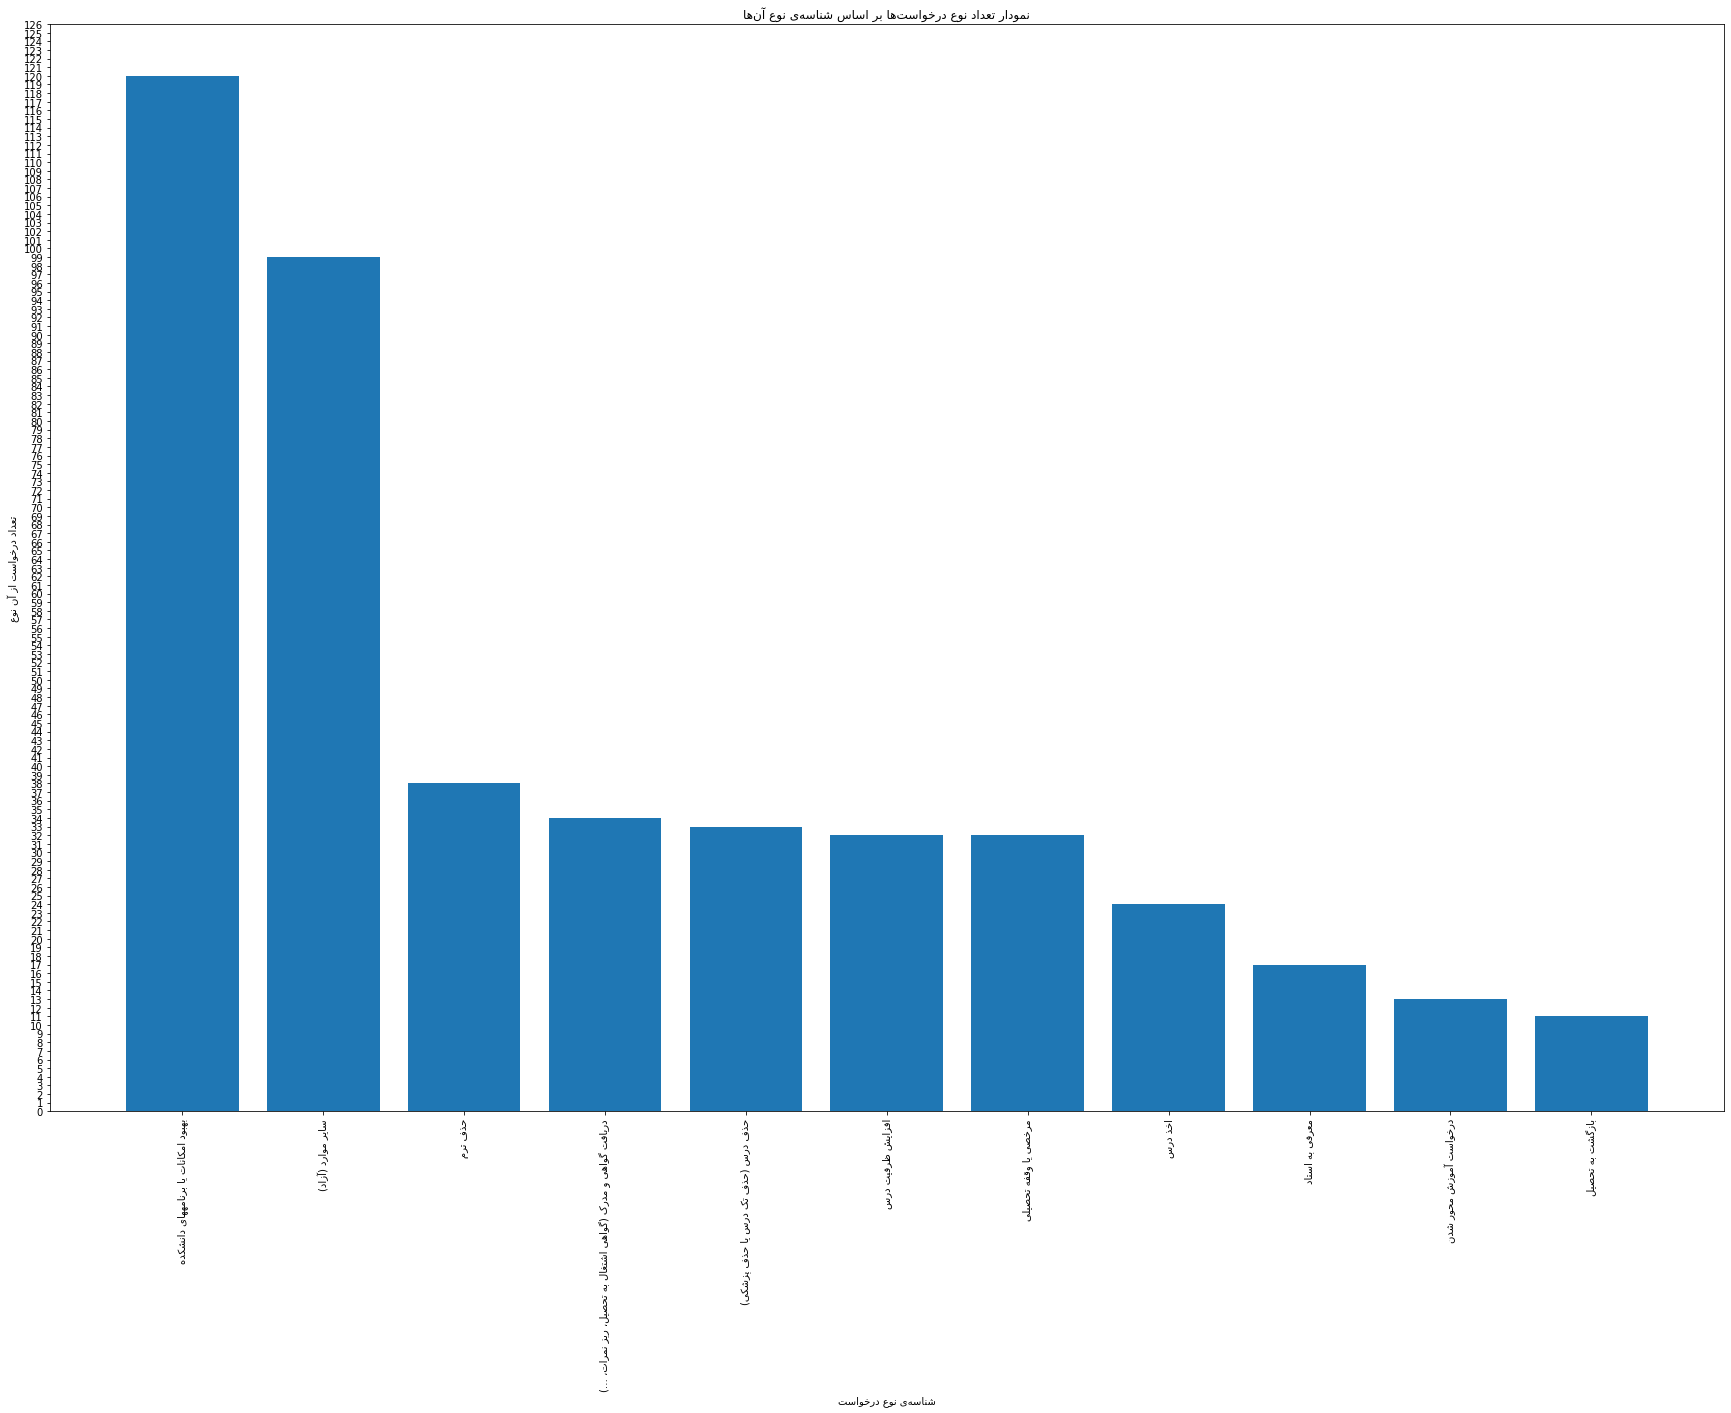

In [ ]:
x = [get_display(reshape(label)) for label in approved_user_requests.groupby('request_type').count().sort_values(by='request_type_id', ascending=False).index]
y = approved_user_requests.groupby('request_type').count().sort_values('index', ascending=False)['index']

plt.figure(figsize=(30, 20))
plt.xlabel(get_display(reshape("شناسه‌ی نوع درخواست")))
plt.ylabel(get_display(reshape("تعداد درخواست از آن نوع")))
plt.title(get_display(reshape("نمودار تعداد نوع درخواست‌ها بر اساس شناسه‌ی نوع آن‌ها")))
plt.xticks(np.arange(0, len(x), 1), rotation=90)
# plt.yticks(np.arange(0, len(y)+1, 1))
plt.yticks(np.arange(0, 130))
plt.bar(x, y)

# Extraction

### Convert to IOB for PhraseMatcher

In [ ]:
def convert_to_IOB(entity_list):
  entity_list_iob = []
  for idx, entity in enumerate(entity_list):
    if 'delete' in entity:
      continue
    else:
      if len(entity['entity'].text.split()) > 1:
        for token_id, token in enumerate(entity['entity'].text.split()):
          if token_id == 0:
            entity_list_iob.append({'id': entity['id'], 'entity': token,
                                'entity_type': entity['entity_type'],
                                'entity_start_index': entity['entity_start_index'],
                                'entity_end_index': entity['entity_start_index'] + 1,
                                'iob_tag': 'B-' + entity['entity_type']})
          else:
            entity_list_iob.append({'id': entity['id'], 'entity': token,
                                'entity_type': entity['entity_type'],
                                'entity_start_index': entity['entity_start_index'] + token_id,
                                'entity_end_index': entity['entity_start_index'] + token_id + 1,
                                'iob_tag': 'I-' + entity['entity_type']})
      else:
        entity_list_iob.append({'id': entity['id'], 'entity': entity['entity'].text,
                                'entity_type': entity['entity_type'],
                                'entity_start_index': entity['entity_start_index'],
                                'entity_end_index': entity['entity_end_index'],
                                'iob_tag': 'B-' + entity['entity_type']})
  
  return entity_list_iob

### Convert to IOB for RegexMatcher

In [ ]:
def convert_to_IOB_regex(entity_list):
  entity_list_iob = []
  for idx, entity in enumerate(entity_list):
    if 'delete' in entity:
      continue
    else:
      if len(entity['entity'].split()) > 1:
        for token_id, token in enumerate(entity['entity'].split()):
          if token_id == 0:
            entity_list_iob.append({'id': entity['id'], 'entity': token,
                                'entity_type': entity['entity_type'],
                                'entity_start_index': entity['entity_start_index'],
                                'entity_end_index': entity['entity_start_index'] + 1,
                                'iob_tag': 'B-' + entity['entity_type']})
          else:
            entity_list_iob.append({'id': entity['id'], 'entity': token,
                                'entity_type': entity['entity_type'],
                                'entity_start_index': entity['entity_start_index'] + token_id,
                                'entity_end_index': entity['entity_start_index'] + token_id + 1,
                                'iob_tag': 'I-' + entity['entity_type']})
      else:
        entity_list_iob.append({'id': entity['id'], 'entity': entity['entity'],
                                'entity_type': entity['entity_type'],
                                'entity_start_index': entity['entity_start_index'],
                                'entity_end_index': entity['entity_end_index'],
                                'iob_tag': 'B-' + entity['entity_type']})
  
  return entity_list_iob

## PhraseMatching:

*   staff
*   professors
*   courses
*   degrees
*   majors
*   orientations



In [ ]:
matcher = PhraseMatcher(nlp.vocab)

def phrase_extractor(texts):
  staff_extracted = []

  staff_names_patterns = [nlp.make_doc(text) for text in staff_names]
  matcher.add("StaffList", staff_names_patterns)
  for idx, text in enumerate(texts):
    doc = nlp(text)
    
    staff_names_matches = matcher(doc)
    for match_id, start, end in staff_names_matches:
      span = doc[start:end]
      staff_extracted.append({'id': idx, 'entity': span,
                              'entity_type': 'staff_name',
                              'entity_start_index': start,
                              'entity_end_index': end})
  
  matcher.remove("StaffList")

  professors_extracted = []

  professor_names_patterns = [nlp.make_doc(text) for text in professor_names]
  matcher.add("ProfessorsList", professor_names_patterns)
  for idx, text in enumerate(texts):
    doc = nlp(text)
    
    professor_names_matches = matcher(doc)
    for match_id, start, end in professor_names_matches:
      span = doc[start:end]
      professors_extracted.append({'id': idx, 'entity': span,
                                   'entity_type': 'professor_name',
                                   'entity_start_index': start,
                                   'entity_end_index': end})

  matcher.remove("ProfessorsList")

  courses_extracted = []

  course_names_patterns = [nlp.make_doc(text) for text in bachelors102.tolist() + bachelors578.tolist() + grad102.tolist() + grad578.tolist()]
  matcher.add("CourseList", course_names_patterns)
  for idx, text in enumerate(texts):
    doc = nlp(text)
    
    course_names_matches = matcher(doc)
    for match_id, start, end in course_names_matches:
      span = doc[start:end]
      courses_extracted.append({'id': idx, 'entity': span,
                                'entity_type': 'course_name',
                                'entity_start_index': start,
                                'entity_end_index': end})
      
  matcher.remove("CourseList")

  degrees_extracted = []

  degree_names_patterns = [nlp.make_doc(text) for text in degrees]
  matcher.add("DegreesList", degree_names_patterns)
  for idx, text in enumerate(texts):
    doc = nlp(text)

    degree_names_matches = matcher(doc)
    for match_id, start, end in degree_names_matches:
      span = doc[start:end]
      degrees_extracted.append({'id': idx, 'entity': span,
                                'entity_type': 'student_degree',
                                'entity_start_index': start,
                                'entity_end_index': end})
      
  matcher.remove("DegreesList")

  majors_extracted = []

  major_names_patterns = [nlp.make_doc(text) for text in majors]
  matcher.add("MajorsList", major_names_patterns)
  for idx, text in enumerate(texts):
    doc = nlp(text)
    
    major_names_matches = matcher(doc)
    for match_id, start, end in major_names_matches:
      span = doc[start:end]
      majors_extracted.append({'id': idx, 'entity': span,
                               'entity_type': 'student_major',
                               'entity_start_index': start,
                               'entity_end_index': end})

  matcher.remove("MajorsList")

  orientations_extracted = []

  orientation_names_patterns = [nlp.make_doc(text) for text in orientations]
  matcher.add("OrientationsList", orientation_names_patterns)
  for idx, text in enumerate(texts):
    doc = nlp(text)

    orientation_names_matches = matcher(doc)
    for match_id, start, end in orientation_names_matches:
      span = doc[start:end]
      orientations_extracted.append({'id': idx, 'entity': span,
                                     'entity_type': 'student_orientation',
                                     'entity_start_index': start,
                                     'entity_end_index': end})

  matcher.remove("OrientationsList")

  return staff_extracted, professors_extracted, courses_extracted, degrees_extracted, majors_extracted, orientations_extracted

In [ ]:
staff_extracted, professors_extracted, courses_extracted, degrees_extracted, majors_extracted, orientations_extracted = phrase_extractor(approved_user_requests['clean_text'])

print(staff_extracted)
print(professors_extracted)
print(courses_extracted)
print(degrees_extracted)
print(majors_extracted)
print(orientations_extracted)

[{'id': 38, 'entity': اکبری, 'entity_type': 'staff_name', 'entity_start_index': 23, 'entity_end_index': 24}, {'id': 293, 'entity': اکبری, 'entity_type': 'staff_name', 'entity_start_index': 4, 'entity_end_index': 5}, {'id': 374, 'entity': برهانی, 'entity_type': 'staff_name', 'entity_start_index': 26, 'entity_end_index': 27}, {'id': 406, 'entity': خانم زندی, 'entity_type': 'staff_name', 'entity_start_index': 5, 'entity_end_index': 7}, {'id': 406, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 6, 'entity_end_index': 7}, {'id': 437, 'entity': خانم زندی, 'entity_type': 'staff_name', 'entity_start_index': 2, 'entity_end_index': 4}, {'id': 437, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 3, 'entity_end_index': 4}, {'id': 452, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 7, 'entity_end_index': 8}]
[{'id': 38, 'entity': علی اکبری, 'entity_type': 'professor_name', 'entity_start_index': 22, 'entity_end_index': 24}, {'id': 39, 'entit

### Delete duplicates in a list

In [ ]:
def delete_duplicates_from_same_category(entity_list):
  for idx, item in enumerate(entity_list):
    if idx != (len(entity_list) - 1):
      if item['id'] == entity_list[idx + 1]['id']:
        if item['entity'].text in entity_list[idx + 1]['entity'].text:
          if item['entity_start_index'] == entity_list[idx + 1]['entity_start_index'] or item['entity_end_index'] == entity_list[idx + 1]['entity_end_index']:
            item['delete'] = True
        elif entity_list[idx + 1]['entity'].text in item['entity'].text:
          if item['entity_start_index'] == entity_list[idx + 1]['entity_start_index'] or item['entity_end_index'] == entity_list[idx + 1]['entity_end_index']:
            entity_list[idx + 1]['delete'] = True

  return entity_list

In [ ]:
print(delete_duplicates_from_same_category(staff_extracted))
print(delete_duplicates_from_same_category(professors_extracted))
print(delete_duplicates_from_same_category(courses_extracted))
print(delete_duplicates_from_same_category(degrees_extracted))
print(delete_duplicates_from_same_category(majors_extracted))
print(delete_duplicates_from_same_category(orientations_extracted))

[{'id': 38, 'entity': اکبری, 'entity_type': 'staff_name', 'entity_start_index': 23, 'entity_end_index': 24}, {'id': 293, 'entity': اکبری, 'entity_type': 'staff_name', 'entity_start_index': 4, 'entity_end_index': 5}, {'id': 374, 'entity': برهانی, 'entity_type': 'staff_name', 'entity_start_index': 26, 'entity_end_index': 27}, {'id': 406, 'entity': خانم زندی, 'entity_type': 'staff_name', 'entity_start_index': 5, 'entity_end_index': 7}, {'id': 406, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 6, 'entity_end_index': 7, 'delete': True}, {'id': 437, 'entity': خانم زندی, 'entity_type': 'staff_name', 'entity_start_index': 2, 'entity_end_index': 4}, {'id': 437, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 3, 'entity_end_index': 4, 'delete': True}, {'id': 452, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 7, 'entity_end_index': 8}]
[{'id': 38, 'entity': علی اکبری, 'entity_type': 'professor_name', 'entity_start_index': 22, 'entity_en

### Delete duplicates in two lists (like merge sort)

*   professors and staff



In [ ]:
def delete_duplicates_from_different_categories(entity_list1, entity_list2):
  i = j = 0
  while i < len(entity_list1) and j < len(entity_list2):
    if entity_list1[i]['id'] == entity_list2[j]['id']:
      if entity_list1[i]['entity'].text in entity_list2[j]['entity'].text:
        if entity_list1[i]['entity_start_index'] == entity_list2[j]['entity_start_index'] or entity_list1[i]['entity_end_index'] == entity_list2[j]['entity_end_index']:
          entity_list1[i]['delete'] = True
      if entity_list2[j]['entity'].text in entity_list1[i]['entity'].text:
        if entity_list1[i]['entity_start_index'] == entity_list2[j]['entity_start_index'] or entity_list1[i]['entity_end_index'] == entity_list2[j]['entity_end_index']:
          entity_list2[j]['delete'] = True

      i += 1
      j += 1
    elif entity_list1[i]['id'] < entity_list2[j]['id']:
      i += 1
    else:
      j += 1

In [ ]:
delete_duplicates_from_different_categories(staff_extracted, professors_extracted)

print(staff_extracted)
print(professors_extracted)

[{'id': 38, 'entity': اکبری, 'entity_type': 'staff_name', 'entity_start_index': 23, 'entity_end_index': 24, 'delete': True}, {'id': 293, 'entity': اکبری, 'entity_type': 'staff_name', 'entity_start_index': 4, 'entity_end_index': 5, 'delete': True}, {'id': 374, 'entity': برهانی, 'entity_type': 'staff_name', 'entity_start_index': 26, 'entity_end_index': 27}, {'id': 406, 'entity': خانم زندی, 'entity_type': 'staff_name', 'entity_start_index': 5, 'entity_end_index': 7}, {'id': 406, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 6, 'entity_end_index': 7, 'delete': True}, {'id': 437, 'entity': خانم زندی, 'entity_type': 'staff_name', 'entity_start_index': 2, 'entity_end_index': 4}, {'id': 437, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 3, 'entity_end_index': 4, 'delete': True}, {'id': 452, 'entity': زندی, 'entity_type': 'staff_name', 'entity_start_index': 7, 'entity_end_index': 8}]
[{'id': 38, 'entity': علی اکبری, 'entity_type': 'professor_name', 'ent

In [ ]:
staff_extracted_iob = convert_to_IOB(staff_extracted)
professors_extracted_iob = convert_to_IOB(professors_extracted)
courses_extracted_iob = convert_to_IOB(courses_extracted)
degrees_extracted_iob = convert_to_IOB(degrees_extracted)
majors_extracted_iob = convert_to_IOB(majors_extracted)
orientations_extracted_iob = convert_to_IOB(orientations_extracted)

### Testing PhraseMatching

In [ ]:
approved_user_requests['clean_text'][38]

'احتراما به عرض میرساند اینجانب سید محمد مهدی علوی مقدم به شماره ۹۹۸۸۷۷۶۶ در نیمسال جاری درس برنامه سازی را با استاد علی اکبری داشتم. متاسفانه سر جلسه امتحان مجازی برق منزل ما قطع شد و من نتوانستم برگهام را آپلود کنم. استاد دلیل من را نپذیرفتند و گفتند از درس میافتم. میخواستم خواهش کنم با حذف این درس موافقت بفرمایید تا مشروط نشوم.'

## Regex matching:

*   Student IDs
*   Entry years



In [ ]:
matcher = Matcher(nlp.vocab)

def regex_extractor(texts):
  student_ids_extracted = []

  student_id_pattern = r"\b((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{7}\b"
  for idx, text in enumerate(texts):
    doc = nlp(text)
    for match in re.finditer(student_id_pattern, doc.text):
        start, end = match.span()
        span = doc.char_span(start, end)
        # This is a Span object or None if match doesn't map to valid token sequence
        if span is not None:
          student_ids_extracted.append({'id': idx, 'entity': span.text,
                                        'entity_type': 'student_id',
                                        'entity_start_index': start,
                                        'entity_end_index': end})

  entry_years_extracted = []

  entry_year_pattern = r"\b(13|\u06F1\u06F3){0,1}((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}\b"
  for idx, text in enumerate(texts):
    doc = nlp(text)
    for match in re.finditer(entry_year_pattern, doc.text):
        start, end = match.span()
        span = doc.char_span(start, end)

        if span is not None:
          entry_years_extracted.append({'id': idx, 'entity': span.text,
                                        'entity_type': 'student_entry_year',
                                        'entity_start_index': start,
                                        'entity_end_index': end})
          
  gpas_extracted = []
          
  gpa_pattern_high_confidence = r"(معدل(م)?(‌| )?)?((1|\u06F1)([\u06F2-\u06F9]|[2-9]){1}|(20|۲۰))((.|,)([\u06F0-\u06F9]|[0-9]){1,2})?\b"
  for idx, text in enumerate(texts):
    doc = nlp(text)
    for match in re.finditer(gpa_pattern_high_confidence, doc.text):
        start, end = match.span()
        span = doc.char_span(start, end)

        if span is not None:
          gpas_extracted.append({'id': idx, 'entity': span.text,
                                        'entity_type': 'student_GPA',
                                        'entity_start_index': start,
                                        'entity_end_index': end})
          
  requested_period_extracted = []

  requested_period_high_confidence = r"((نیم)(‌| )?(سال)(‌| )(اول|دوم)(‌| )((سال)(‌| )(تحصیلی(‌| )?)?)?(13|\u06F1\u06F3)?((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}-(13|\u06F1\u06F3)?((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1}|(پاییز|بهار)(‌|\s)(13|\u06F1\u06F3)?((\u06F8|8)|(\u06F9|9))[\u06F0-\u06F90-9]{1})\b"
  for idx, text in enumerate(texts):
    doc = nlp(text)
    for match in re.finditer(requested_period_high_confidence, doc.text):
        start, end = match.span()
        span = doc.char_span(start, end)

        if span is not None:
          requested_period_extracted.append({'id': idx, 'entity': span.text,
                                        'entity_type': 'requested_period',
                                        'entity_start_index': start,
                                        'entity_end_index': end})

  return student_ids_extracted, entry_years_extracted, gpas_extracted, requested_period_extracted

In [ ]:
student_ids_extracted, entry_years_extracted, gpas_extracted, requested_period_extracted = regex_extractor(approved_user_requests['clean_text'])

print(student_ids_extracted)
print(entry_years_extracted)
print(gpas_extracted)
print(requested_period_extracted)

[{'id': 0, 'entity': '۹۹۹۹۹۹۹۹', 'entity_type': 'student_id', 'entity_start_index': 32, 'entity_end_index': 40}, {'id': 5, 'entity': '۹۶۱۱۱۱۱۱', 'entity_type': 'student_id', 'entity_start_index': 48, 'entity_end_index': 56}, {'id': 11, 'entity': '۹۸۴۴۳۱۳۷', 'entity_type': 'student_id', 'entity_start_index': 60, 'entity_end_index': 68}, {'id': 38, 'entity': '۹۹۸۸۷۷۶۶', 'entity_type': 'student_id', 'entity_start_index': 64, 'entity_end_index': 72}, {'id': 73, 'entity': '۹۹۵۴۳۰۱۰', 'entity_type': 'student_id', 'entity_start_index': 57, 'entity_end_index': 65}, {'id': 89, 'entity': '۹۹۴۴۳۰۰۲', 'entity_type': 'student_id', 'entity_start_index': 56, 'entity_end_index': 64}, {'id': 128, 'entity': '۹۷۴۴۳۱۴۵', 'entity_type': 'student_id', 'entity_start_index': 65, 'entity_end_index': 73}, {'id': 129, 'entity': '۹۸۴۴۳۲۵۸', 'entity_type': 'student_id', 'entity_start_index': 41, 'entity_end_index': 49}, {'id': 132, 'entity': '۹۸۵۴۳۰۰۷', 'entity_type': 'student_id', 'entity_start_index': 55, 'entit

In [ ]:
student_ids_extracted_iob = convert_to_IOB_regex(student_ids_extracted)
entry_years_extracted_iob = convert_to_IOB_regex(entry_years_extracted)
gpas_extracted_iob = convert_to_IOB_regex(gpas_extracted)
requested_period_extracted_iob = convert_to_IOB_regex(requested_period_extracted)

print(student_ids_extracted_iob)

[{'id': 0, 'entity': '۹۹۹۹۹۹۹۹', 'entity_type': 'student_id', 'entity_start_index': 32, 'entity_end_index': 40, 'iob_tag': 'B-student_id'}, {'id': 5, 'entity': '۹۶۱۱۱۱۱۱', 'entity_type': 'student_id', 'entity_start_index': 48, 'entity_end_index': 56, 'iob_tag': 'B-student_id'}, {'id': 11, 'entity': '۹۸۴۴۳۱۳۷', 'entity_type': 'student_id', 'entity_start_index': 60, 'entity_end_index': 68, 'iob_tag': 'B-student_id'}, {'id': 38, 'entity': '۹۹۸۸۷۷۶۶', 'entity_type': 'student_id', 'entity_start_index': 64, 'entity_end_index': 72, 'iob_tag': 'B-student_id'}, {'id': 73, 'entity': '۹۹۵۴۳۰۱۰', 'entity_type': 'student_id', 'entity_start_index': 57, 'entity_end_index': 65, 'iob_tag': 'B-student_id'}, {'id': 89, 'entity': '۹۹۴۴۳۰۰۲', 'entity_type': 'student_id', 'entity_start_index': 56, 'entity_end_index': 64, 'iob_tag': 'B-student_id'}, {'id': 128, 'entity': '۹۷۴۴۳۱۴۵', 'entity_type': 'student_id', 'entity_start_index': 65, 'entity_end_index': 73, 'iob_tag': 'B-student_id'}, {'id': 129, 'entity'

### Testing regex matching

In [ ]:
approved_user_requests['clean_text'][0]

'من نغمه مرادی به شماره دانشجویی ۹۹۹۹۹۹۹۹ دانشجوی کارشناسی کامپیوتر هستم. در ترم جاری ۱۴ واحد دارم ولی بدلیل بیماری پدرم نمیتونم درس بخوانم. میخواستم خواهش کنم با حذف یک درس من موافقت کنید چون حذف این درس باعث میشه تعداد واحدهام ۱۱ تا بشه و سیستم اجازه نمیده. از لطفتون خیلی خیلی ممنونم'

# Applying ParsBERT NER to the data

## NER entity translation

In [ ]:
ner_translate = {
    "B-date": "تاریخ",
    "B-event": "رویداد",
    "B-facility": "امکانات",
    "B-location": "موقعیت",
    "B-money": "پول",
    "B-organization": "سازمان",
    "B-person": "شخص",
    "B-product": "محصول",
    "B-time": "زمان",
    "B-percent": "درصد",
    "I-date": "تاریخ",
    "I-event": "رویداد",
    "I-facility": "امکانات",
    "I-location": "موقعیت",
    "I-money": "پول",
    "I-organization": "سازمان",
    "I-person": "شخص",
    "I-product": "محصول",
    "I-time": "زمان",
    "I-percent": "درصد",
    "O": None
}

In [ ]:
def parsbert_ner_load_model(model_name):
  """Load the model"""
  try:
    config = AutoConfig.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = TFAutoModelForTokenClassification.from_pretrained(model_name)
    labels = list(config.label2id.keys())

    return model, tokenizer, labels
  except:
    return [None] * 3

def parsbert_ner(texts, model_name, label_translate, visualize=True):
  """Predict and visualize the NER!"""
  global css_is_load
    
  css_is_load = False
  css = """<style>
  .ner-box {
    direction: rtl;
    font-size: 18px !important;
    line-height: 20px !important;
    margin: 0 0 15px;
    padding: 10px;
    text-align: justify;
    color: #cbcbcb !important;
  }
  .token, .token span {
    display: inline-block !important;
    padding: 2px;
    margin: 2px 0;
  }
  .token.token-ner {
    background-color: #f6cd61;
    font-weight: bold;
    color: #000;
  }
  .token.token-ner .ner-label {
    color: #9a1f40;
    margin: 0px 2px;
  }
  </style>"""

  if not css_is_load:
    display(HTML(css))
    css_is_load = True

  model, tokenizer, labels = parsbert_ner_load_model(model_name)

  if not model or not tokenizer or not labels:
    return 'Something wrong has been happened!'
    
  output_predictions = []
  for index, sequence in enumerate(texts):
    sequence = cleaning(sequence)
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
    inputs = tokenizer.encode(sequence, return_tensors="tf")
    outputs = model(inputs)[0]
    predictions = tf.argmax(outputs, axis=2)
    predictions = [(token, label_translate[labels[prediction]]) for token, prediction in zip(tokens, predictions[0].numpy())]
        
    if not visualize:
      predictions = tf.argmax(outputs, axis=2)
      for token_id, token_prediction_tuple in enumerate(zip(tokens, predictions[0].numpy())):
        output_predictions.append({'id': index, 'token_id': token_id, 'token': token_prediction_tuple[0], 'prediction': labels[token_prediction_tuple[1]]})
    else:
      pred_sequence = []
      for token, label in predictions:
        if token not in ['[CLS]', '[SEP]']:
          if label:
            pred_sequence.append(
                '<span class="token token-ner">%s<span class="ner-label">%s</span></span>' 
                % (token, label))
          else:
            pred_sequence.append(
                '<span class="token">%s</span>' 
                % token)
                
      html = '<p class="ner-box">%s</p>' % ' '.join(pred_sequence) 
      display(HTML(html))

  return output_predictions

In [ ]:
model_name = 'HooshvareLab/bert-base-parsbert-ner-uncased'
output_predictions = parsbert_ner(approved_user_requests['clean_text'], model_name, ner_translate, visualize=False)
output_predictions

All model checkpoint layers were used when initializing TFBertForTokenClassification.

All the layers of TFBertForTokenClassification were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-ner-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


[{'id': 0, 'prediction': 'O', 'token': '[CLS]', 'token_id': 0},
 {'id': 0, 'prediction': 'O', 'token': 'من', 'token_id': 1},
 {'id': 0, 'prediction': 'B-person', 'token': 'نغمه', 'token_id': 2},
 {'id': 0, 'prediction': 'I-person', 'token': 'مرادی', 'token_id': 3},
 {'id': 0, 'prediction': 'O', 'token': 'به', 'token_id': 4},
 {'id': 0, 'prediction': 'O', 'token': 'شماره', 'token_id': 5},
 {'id': 0, 'prediction': 'O', 'token': 'دانشجویی', 'token_id': 6},
 {'id': 0, 'prediction': 'O', 'token': '۹۹۹', 'token_id': 7},
 {'id': 0, 'prediction': 'O', 'token': '##۹۹۹۹', 'token_id': 8},
 {'id': 0, 'prediction': 'O', 'token': '##۹', 'token_id': 9},
 {'id': 0, 'prediction': 'O', 'token': 'دانشجوی', 'token_id': 10},
 {'id': 0, 'prediction': 'O', 'token': 'کارشناسی', 'token_id': 11},
 {'id': 0, 'prediction': 'O', 'token': 'کامپیوتر', 'token_id': 12},
 {'id': 0, 'prediction': 'O', 'token': 'هستم', 'token_id': 13},
 {'id': 0, 'prediction': 'O', 'token': '.', 'token_id': 14},
 {'id': 0, 'prediction': 

In [ ]:
entity = ''
entity_type = ''
entity_start_index = 0
entity_end_index = 0
ner_predictions = []

for idx, tuple in enumerate(output_predictions):
  id = tuple['id']
  token_id = tuple['token_id']
  token = tuple['token']
  prediction = tuple['prediction']

  if token not in ['[CLS]', '[SEP]']:
    if prediction.split('-')[0] == 'B':
      entity = token
      entity_type = prediction.split('-')[1]
      entity_start_index = token_id
      entity_end_index = token_id
    elif prediction.split('-')[0] == 'I':
      entity += (' ' + token)
      entity_end_index = token_id
    elif prediction == 'O':
      if entity != '':
        if idx < len(output_predictions) - 1 and idx > 0:
          prev_prediction = output_predictions[idx - 1]['prediction']
          next_prediction = output_predictions[idx + 1]['prediction']
          if output_predictions[idx - 1]['id'] == id and id == output_predictions[idx + 1]['id'] and (prev_prediction != 'O' and next_prediction != 'O'):
            if prev_prediction.split('-')[1] == next_prediction.split('-')[1] and next_prediction.split('-')[0] == 'I':
              tuple['prediction'] = next_prediction
              entity += (' ' + token)
              entity_end_index = token_id
          else:
            ner_predictions.append({'id': id, 'entity': entity,
                                    'entity_type': entity_type,
                                    'entity_start_index': entity_start_index,
                                    'entity_end_index': entity_end_index})
            
            entity = ''
            entity_type = ''
        else:
          ner_predictions.append({'id': id, 'entity': entity,
                                  'entity_type': entity_type,
                                  'entity_start_index': entity_start_index,
                                  'entity_end_index': entity_end_index})
          entity = ''
          entity_type = ''

In [ ]:
ner_predictions

[{'entity': 'نغمه مرادی',
  'entity_end_index': 3,
  'entity_start_index': 2,
  'entity_type': 'person',
  'id': 0},
 {'entity': '۱۰۰ درصد',
  'entity_end_index': 50,
  'entity_start_index': 49,
  'entity_type': 'percent',
  'id': 4},
 {'entity': 'x',
  'entity_end_index': 6,
  'entity_start_index': 6,
  'entity_type': 'person',
  'id': 6},
 {'entity': 'دفتر استعداد درخشان',
  'entity_end_index': 9,
  'entity_start_index': 7,
  'entity_type': 'organization',
  'id': 7},
 {'entity': 'سال ۱۳۹۸',
  'entity_end_index': 8,
  'entity_start_index': 7,
  'entity_type': 'date',
  'id': 11},
 {'entity': 'مجله nature',
  'entity_end_index': 131,
  'entity_start_index': 130,
  'entity_type': 'product',
  'id': 14},
 {'entity': 'سایت گلستان',
  'entity_end_index': 6,
  'entity_start_index': 5,
  'entity_type': 'organization',
  'id': 22},
 {'entity': 'سایت گلستان',
  'entity_end_index': 24,
  'entity_start_index': 23,
  'entity_type': 'organization',
  'id': 23},
 {'entity': 'سید محمد مهدی علوی مقد

## Visualize ParsBERT NER results

In [ ]:
_ = parsbert_ner(approved_user_requests['clean_text'], model_name, ner_translate, visualize=True)

Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-ner-uncased were not used when initializing TFBertForTokenClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-ner-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


# NER validation

In [ ]:
tag_list = [
            'B-student_name',
            'I-student_name',
            'B-student_id',
            'I-student_id',
            'B-student_entry_year',
            'I-student_entry_year',
            'B-student_degree',
            'I-student_degree',
            'B-student_major',
            'I-student_major',
            'B-student_orientation',
            'I-student_orientation',
            'B-student_GPA',
            'I-student_GPA',
            'B-student_passed_credit',
            'I-student_passed_credit',
            'B-course_name',
            'I-course_name',
            'B-professor_name',
            'I-professor_name',
            'O'
]

In [ ]:
student_name_tags = []
student_id_tags = []
student_entry_year_tags = []
student_degree_tags = []
student_major_tags = []
student_orientation_tags = []
student_gpa_tags = []
student_passed_credit_tags = []
course_name_tags = []
professor_name_tags = []
tags = []

wrong_iob_tags = []

for idx, tag in enumerate(approved_user_requests['IOB_tag']):
  if not tag:
    continue

  else:
    for line in tag.splitlines():
      line = line.strip()
      if len(line.split()) != 2:
        wrong_iob_tags.append({'id': idx, 'iob_tags': line})
        continue

      else:
        if line.split()[1] not in tag_list:
          wrong_iob_tags.append({'id': idx, 'iob_tags': line})
          continue
        else:
          entity = cleaning(line.split()[0])
          iob_tag = line.split()[1]

          tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})

          if iob_tag == 'O':
            continue

          else:
            if len(iob_tag.split('-')) != 2:
              wrong_iob_tags.append({'id': idx, 'iob_tags': line})
              continue

            else:
              iob_tag_splitted = iob_tag.split('-')
              if iob_tag_splitted[1] == 'student_name':
                student_name_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_id':
                student_id_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_entry_year':
                student_entry_year_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_degree':
                student_degree_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_major':
                student_major_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_orientation':
                student_orientation_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_GPA':
                student_gpa_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'student_passed_credit':
                student_passed_credit_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'course_name':
                course_name_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})
              elif iob_tag_splitted[1] == 'professor_name':
                professor_name_tags.append({'id': idx, 'token': entity, 'iob_tag': iob_tag})

print(len(student_name_tags))
print(len(student_id_tags))
print(len(student_entry_year_tags))
print(len(student_degree_tags))
print(len(student_major_tags))
print(len(student_orientation_tags))
print(len(student_gpa_tags))
print(len(student_passed_credit_tags))
print(len(course_name_tags))
print(len(professor_name_tags))
print(len(tags))

234
70
23
104
81
58
2
1
245
51
5573


In [ ]:
correct = []
miss = []

def validate_util(tags_list, extracted_tags_list):
  i = j = 0
  while i < len(tags_list) and j < len(extracted_tags_list):
    if tags_list[i]['id'] == extracted_tags_list[j]['id']:
      if tags_list[i]['token'] == extracted_tags_list[j]['entity']:
        correct.append({'id': tags_list[i]['id'],
                              'entity': tags_list[i]['token'],
                              'iob_tag': tags_list[i]['iob_tag']
                              })
        i += 1
        j += 1
      else:
        temp_j = j
        while extracted_tags_list[temp_j]['id'] == extracted_tags_list[j]['id']:
          if extracted_tags_list[temp_j]['entity'] != tags_list[i]['token']:
            temp_j += 1
            if extracted_tags_list[temp_j]['id'] != extracted_tags_list[j]['id']:
              miss.append({'id': tags_list[i]['id'],
                          'entity': tags_list[i]['token'],
                          'was_in': 'annotated'})
              i += 1
          else:
            correct.append({'id': tags_list[i]['id'],
                              'entity': tags_list[i]['token'],
                              'iob_tag': tags_list[i]['iob_tag']
                              })
            i += 1
            j += 1
            break

        # print(tags_list[i]['id'])
        # print(tags_list[i]['token'])
        # print(extracted_tags_list[j]['entity'])
    elif tags_list[i]['id'] < extracted_tags_list[j]['id']:
      while tags_list[i]['id'] < extracted_tags_list[j]['id']:
        miss.append({'id': tags_list[i]['id'],
                          'entity': tags_list[i]['token'],
                          'was_in': 'annotated'})
        i += 1
        if i >= len(tags_list):
          break
    else:
      while tags_list[i]['id'] > extracted_tags_list[j]['id']:
        miss.append({'id': extracted_tags_list[j]['id'],
                          'entity': extracted_tags_list[j]['entity'],
                          'was_in': 'extracted'})
        j += 1
        if j >= len(tags_list):
          break

def validate(entity_type):
  if entity_type == 'student_name':
    # FIX ME: change student_ids_extracted_iob
    validate_util(student_name_tags, student_ids_extracted_iob)
  elif entity_type == 'student_id':
    validate_util(student_id_tags, student_ids_extracted_iob)
  elif entity_type == 'student_entry_year':
    validate_util(student_entry_year_tags, entry_years_extracted_iob)
  elif entity_type == 'student_degree':
    validate_util(student_degree_tags, degrees_extracted_iob)
  elif entity_type == 'student_major':
    validate_util(student_major_tags, majors_extracted_iob)
  elif entity_type == 'student_orientation':
    validate_util(student_orientation_tags, orientations_extracted_iob)
  elif entity_type == 'student_GPA':
    validate_util(student_gpa_tags, gpas_extracted_iob)
  elif entity_type == 'course_name':
    validate_util(course_name_tags, courses_extracted_iob)
  elif entity_type == 'professor_name':
    validate_util(professor_name_tags, professors_extracted_iob)
  
  return correct, miss

In [ ]:
correct = []
miss = []
correct_list, miss_list = validate('student_id')
print('Student ID accuracy: %f'% (len(correct_list) * 100 / len(student_ids_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('student_entry_year')
print('Student entry year accuracy: %f'% (len(correct_list) * 100 / len(entry_years_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('student_degree')
print('Student Degree accuracy: %f'% (len(correct_list) * 100 / len(degrees_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('student_major')
print('Student Major accuracy: %f'% (len(correct_list) * 100 / len(majors_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('student_orientation')
print('Student Orientation accuracy: %f'% (len(correct_list) * 100 / len(orientations_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('student_GPA')
print('Student GPA accuracy: %f'% (len(correct_list) * 100 / len(gpas_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('course_name')
print('Course name accuracy: %f'% (len(correct_list) * 100 / len(courses_extracted_iob)))
print(miss_list)

correct = []
miss = []
correct_list, miss_list = validate('professor_name')
print('Professor name accuracy: %f'% (len(correct_list) * 100 / len(professors_extracted_iob)))
print(miss_list)

Student ID accuracy: 63.043478
[{'id': 164, 'entity': '۹۹۸۸۷۷۶۶', 'was_in': 'annotated'}, {'id': 184, 'entity': '۹۶۲۲۱۱۸۸', 'was_in': 'extracted'}, {'id': 206, 'entity': '۹۸۹۹۰۰', 'was_in': 'annotated'}, {'id': 207, 'entity': '(۹۶۰۰۹۶)', 'was_in': 'annotated'}, {'id': 208, 'entity': '۹۷۶۵۴۳', 'was_in': 'annotated'}, {'id': 213, 'entity': '۹۸۹۷۹۶', 'was_in': 'annotated'}, {'id': 219, 'entity': '۹۶۰۰۹۶', 'was_in': 'annotated'}, {'id': 229, 'entity': '۹۹۱۰۱۰', 'was_in': 'annotated'}, {'id': 230, 'entity': '۹۶۶۵۴۷', 'was_in': 'annotated'}, {'id': 231, 'entity': '۹۸۹۸۳۲', 'was_in': 'annotated'}, {'id': 241, 'entity': '۹۰۰۰۰۰', 'was_in': 'annotated'}, {'id': 250, 'entity': '۹۹۴۴۳۱۴۰', 'was_in': 'extracted'}, {'id': 252, 'entity': '۹۹۴۴۳۱۴۰', 'was_in': 'extracted'}, {'id': 253, 'entity': '۹۹۹۸۹۷۹۶', 'was_in': 'extracted'}, {'id': 254, 'entity': '۹۹۴۷۸۵۹۴', 'was_in': 'extracted'}, {'id': 256, 'entity': '۹۹۸۵۴۷۵۱', 'was_in': 'extracted'}, {'id': 257, 'entity': '۹۴۹۵۴۴۲۴', 'was_in': 'extracted'}

# Request type detection

In [ ]:
!nvidia-smi

Wed Feb  3 09:39:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   2253MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import hazm
from cleantext import clean

import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm

import os
import re
import json
import copy
import collections

In [ ]:
data = approved_user_requests[['clean_text', 'request_type', 'request_type_id']]
data.head()

,clean_text,request_type,request_type_id
0,من نغمه مرادی به شماره دانشجویی ۹۹۹۹۹۹۹۹ دانشج...,حذف درس (حذف تک درس یا حذف پزشکی),0
1,سلام لطفا انتخاب واحد اینجانب را تایید بفرمایید.,سایر موارد (آزاد),1
2,سلام خسته نباشید. ببخشید راهی هست که محدودیت ک...,بهبود امکانات یا برنامههای دانشکده,2
3,سلام خانم دکتر روزتون بخیر. ببخشید ما امتحانها...,سایر موارد (آزاد),1
4,سلام روزتون بخیر. میخواستم ببینم امکانش هست ای...,بهبود امکانات یا برنامههای دانشکده,2


In [ ]:
print(data['request_type'].unique())
print('missing values stats')
print(data.isnull().sum())

['حذف درس (حذف تک درس یا حذف پزشکی)' 'سایر موارد (آزاد)'
 'بهبود امکانات یا برنامههای دانشکده'
 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)'
 'مرخصی یا وقفه تحصیلی' 'حذف ترم' 'افزایش ظرفیت درس' 'اخذ درس'
 'معرفی به استاد' 'درخواست آموزش محور شدن' 'بازگشت به تحصیل']
missing values stats
clean_text         0
request_type       0
request_type_id    0
dtype: int64


In [ ]:
train, test = train_test_split(data, test_size=0.1, random_state=1, stratify=data['request_type'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['request_type'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['clean_text'].values.tolist(), train['request_type_id'].values.tolist()
x_valid, y_valid = valid['clean_text'].values.tolist(), valid['request_type_id'].values.tolist()
x_test, y_test = test['clean_text'].values.tolist(), test['request_type_id'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(366, 3)
(41, 3)
(46, 3)


In [ ]:
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [ ]:
# general config
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 20
EEVERY_EPOCH = 50
LEARNING_RATE = 2e-5
CLIP = 0.0

MODEL_NAME_OR_PATH = 'HooshvareLab/bert-fa-base-uncased'
OUTPUT_PATH = '/content/bert-fa-base-uncased-sentiment-taaghceh/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [ ]:
label2id = {label: i for i, label in enumerate(approved_user_requests['request_type'].unique())}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'حذف درس (حذف تک درس یا حذف پزشکی)': 0, 'سایر موارد (آزاد)': 1, 'بهبود امکانات یا برنامههای دانشکده': 2, 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)': 3, 'مرخصی یا وقفه تحصیلی': 4, 'حذف ترم': 5, 'افزایش ظرفیت درس': 6, 'اخذ درس': 7, 'معرفی به استاد': 8, 'درخواست آموزش محور شدن': 9, 'بازگشت به تحصیل': 10}
id2label: {0: 'حذف درس (حذف تک درس یا حذف پزشکی)', 1: 'سایر موارد (آزاد)', 2: 'بهبود امکانات یا برنامههای دانشکده', 3: 'دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)', 4: 'مرخصی یا وقفه تحصیلی', 5: 'حذف ترم', 6: 'افزایش ظرفیت درس', 7: 'اخذ درس', 8: 'معرفی به استاد', 9: 'درخواست آموزش محور شدن', 10: 'بازگشت به تحصیل'}


In [ ]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(
    MODEL_NAME_OR_PATH, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())


{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "\u062d\u0630\u0641 \u062f\u0631\u0633 (\u062d\u0630\u0641 \u062a\u06a9 \u062f\u0631\u0633 \u06cc\u0627 \u062d\u0630\u0641 \u067e\u0632\u0634\u06a9\u06cc)",
    "1": "\u0633\u0627\u06cc\u0631 \u0645\u0648\u0627\u0631\u062f (\u0622\u0632\u0627\u062f)",
    "2": "\u0628\u0647\u0628\u0648\u062f \u0627\u0645\u06a9\u0627\u0646\u0627\u062a \u06cc\u0627 \u0628\u0631\u0646\u0627\u0645\u0647\u0647\u0627\u06cc \u062f\u0627\u0646\u0634\u06a9\u062f\u0647",
    "3": "\u062f\u0631\u06cc\u0627\u0641\u062a \u06af\u0648\u0627\u0647\u06cc \u0648 \u0645\u062f\u0631\u06a9 (\u06af\u0648\u0627\u0647\u06cc \u0627\u0634\u062a\u063a\u0627\u0644 \u0628\u0647 \u062a\u062d\u0635\u06cc\u0644\u060c \u0631\u06cc\u0632 \u0646\u0645\u0631\u0627\u062a\u060c \u2026)",
    "4": "\u0645\u0631\u062e\u

In [ ]:
idx = np.random.randint(0, len(train))
sample_comment = train.iloc[idx]['clean_text']
sample_label = train.iloc[idx]['request_type']

print(f'Sample: \n{sample_comment}\n{sample_label}')

Sample: 
با عرض سلام و خسته نباشید، با توجه به ترم آخر تحصیل و درس دکتر قوامی زاده به عنوان تنها درس پاس نشده و از طرفی پر شدن ظرفیت درس، درخواست افزایش ظرفیت دارم.
افزایش ظرفیت درس


In [ ]:
tokens = tokenizer.tokenize(sample_comment)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'  Comment: {sample_comment}')
print(f'   Tokens: {tokenizer.convert_tokens_to_string(tokens)}')
print(f'Token IDs: {token_ids}')

  Comment: با عرض سلام و خسته نباشید، با توجه به ترم آخر تحصیل و درس دکتر قوامی زاده به عنوان تنها درس پاس نشده و از طرفی پر شدن ظرفیت درس، درخواست افزایش ظرفیت دارم.
   Tokens: با عرض سلام و خسته نباشید ، با توجه به ترم اخر تحصیل و درس دکتر قوامی زاده به عنوان تنها درس پاس نشده و از طرفی پر شدن ظرفیت درس ، درخواست افزایش ظرفیت دارم .
Token IDs: [2799, 3773, 4285, 1379, 9231, 11912, 1348, 2799, 3211, 2789, 12472, 5109, 5106, 1379, 5969, 4283, 29157, 4917, 2789, 3014, 3327, 5969, 3629, 4338, 1379, 2791, 7644, 3101, 3322, 5127, 5969, 1348, 4905, 3191, 5127, 6052, 1012]


In [ ]:
encoding = tokenizer.encode_plus(
    sample_comment,
    max_length=32,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[    2,  2799,  3773,  4285,  1379,  9231, 11912,  1348,  2799,  3211,
          2789, 12472,  5109,  5106,  1379,  5969,  4283, 29157,  4917,  2789,
          3014,  3327,  5969,  3629,  4338,  1379,  2791,  7644,  3101,  3322,
          5127,     4]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])


In [ ]:
class RequestsDataset(torch.utils.data.Dataset):
    def __init__(self, tokenizer, comments, targets=None, label_list=None, max_len=128):
        self.comments = comments
        self.targets = targets
        self.has_target = isinstance(targets, list) or isinstance(targets, np.ndarray)

        self.tokenizer = tokenizer
        self.max_len = max_len

        
        self.label_map = {label: i for i, label in enumerate(label_list)} if isinstance(label_list, list) else {}
    
    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])

        if self.has_target:
            target = self.label_map.get(str(self.targets[item]), str(self.targets[item]))

        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')
        
        inputs = {
            'comment': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        if self.has_target:
            inputs['targets'] = torch.tensor(target, dtype=torch.long)
        
        return inputs


def create_data_loader(x, y, tokenizer, max_len, batch_size, label_list):
    dataset = RequestsDataset(
        comments=x,
        targets=y,
        tokenizer=tokenizer,
        max_len=max_len, 
        label_list=label_list)
    
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [ ]:
label_list = data['request_type'].unique().tolist()
train_data_loader = create_data_loader(train['clean_text'].to_numpy(), train['request_type'].to_numpy(), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, label_list)
valid_data_loader = create_data_loader(valid['clean_text'].to_numpy(), valid['request_type'].to_numpy(), tokenizer, MAX_LEN, VALID_BATCH_SIZE, label_list)
test_data_loader = create_data_loader(test['clean_text'].to_numpy(), None, tokenizer, MAX_LEN, TEST_BATCH_SIZE, label_list)

In [ ]:
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

print(sample_data['comment'])
print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(sample_data['targets'].shape)
print(sample_data['targets'][0])

dict_keys(['comment', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])
['سلام، من دانشجوی ورودی جدید دکتری هستم به شماره دانشجویی ۹۹۵۴۳۰۱۰، در ماه اخیر متاسفانه مشکلی برایم پیش آمد و باعث شد از روال طبیعی درس خواندن جا بمانم و به دلیل کوتاهی ترم در شرایط کرونایی، فرصت برای جبران زمان از دست رفته برایم کم است، بنابراین تقاضای حذف ترم دارم.', 'سلام، خسته نباشید. اینجانب روزبه ربیعی هستم فارغ التحصیل مقطع ارشد هستم. ببخشید من برای ثبت نام در دانشگاه مقصد قادر به دریافت گواهی ریزنمرات خود از گلستان نیستم. ممنون میشوم که راهنمایی بفرمایید. با سپاس', 'لطفا به فکر جایگزینی کامپیوترهای سایت باشید. توان پردازشی خیلی پائینی دارند.', 'سلام خدمت خانم زندی. حسنی کیانفر، دانشجوی ترم اخر رشته کامپیوتر به شماره شناسایی ۹۵۱۰۰۳۱۱۳ هستم درخواست اخذ درس مدارهای الکتریکی از چارت درسی ترم ۳ را دارم.', 'من دانشجوی ترم آخر معماری سازمانی هستم. برای انجام پروژه پایان نامه احتیاج به کامپیوتر دارم. متاسفانه کامپیوترهای آزمایشگاه توان پردازشی کافی ندارند. ممنون میشوم اقداماتی در راستای بهبود این سیستم

In [ ]:
sample_test = next(iter(test_data_loader))
print(sample_test.keys())

dict_keys(['comment', 'input_ids', 'attention_mask', 'token_type_ids'])


In [ ]:
class RequestTypeModel(nn.Module):

    def __init__(self, config):
        super(RequestTypeModel, self).__init__()

        self.bert = BertModel.from_pretrained(MODEL_NAME_OR_PATH)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    
    def forward(self, input_ids, attention_mask, token_type_ids):
        output = self.bert(
            input_ids=input_ids, 
            attention_mask=attention_mask, 
            token_type_ids=token_type_ids)
        
        pooler_output = self.dropout(output.pooler_output)
        logits = self.classifier(pooler_output)
        return logits 

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()
pt_model = None

!nvidia-smi

Wed Feb  3 09:39:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   2581MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pt_model = RequestTypeModel(config=config)
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))


pt_model <class '__main__.RequestTypeModel'>


In [ ]:
# sample data output

sample_data_comment = sample_data['comment']
sample_data_input_ids = sample_data['input_ids']
sample_data_attention_mask = sample_data['attention_mask']
sample_data_token_type_ids = sample_data['token_type_ids']
sample_data_targets = sample_data['targets']

# available for using in GPU
sample_data_input_ids = sample_data_input_ids.to(device)
sample_data_attention_mask = sample_data_attention_mask.to(device)
sample_data_token_type_ids = sample_data_token_type_ids.to(device)
sample_data_targets = sample_data_targets.to(device)


# outputs = F.softmax(
#     pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids), 
#     dim=1)

outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids)
_, preds = torch.max(outputs, dim=1)

print(outputs[:5, :])
print(preds[:5])

tensor([[-0.3558, -0.2995, -0.4284,  0.5969,  0.1052,  0.1830,  0.1090, -0.1034,
          0.1391,  0.4591, -0.5286],
        [-0.2831, -0.3829, -0.3068,  0.3926, -0.3984, -0.1374,  0.2207,  0.0440,
          0.3869,  0.4354, -0.6493],
        [-0.1703, -0.2016, -0.2692,  0.3624, -0.5351, -0.1615,  0.2015, -0.0091,
          0.5012,  0.4295, -1.1651],
        [-0.1744, -0.5055, -0.2571,  0.4346, -0.3699, -0.3290,  0.2062, -0.0940,
          0.3372,  0.4666, -0.9588],
        [-0.0885, -0.7405, -0.3565,  0.4704, -0.7566, -0.1691,  0.4995,  0.0245,
          0.2771,  0.5308, -0.7639]], grad_fn=<SliceBackward>)
tensor([3, 9, 8, 9, 9])


In [ ]:
def simple_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def acc_and_f1(y_true, y_pred, average='weighted'):
    acc = simple_accuracy(y_true, y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):
            
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            targets = dl['targets']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            targets = targets.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)
            
            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            loss = loss_fn(outputs, targets)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(targets)
    
    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model, 
             data_loader, 
             loss_fn, 
             optimizer, 
             scheduler, 
             step=0, 
             print_every_step=100, 
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None, 
             clip=0.0):
    
    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        
        # convert output probabilities to predicted class
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        loss = loss_fn(outputs, targets)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(targets)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

In [ ]:
optimizer = AdamW(pt_model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)


def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)
        
        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))
            
            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss
        
        return eval_loss_min


    return eval_cb


for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model, 
        data_loader=train_data_loader, 
        loss_fn=loss_fn, 
        optimizer=optimizer, 
        scheduler=scheduler, 
        step=step, 
        print_every_step=EEVERY_EPOCH, 
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=valid_data_loader, 
        clip=CLIP)
    
    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')
    
    eval_y, eval_loss = eval_op(
        model=pt_model, 
        data_loader=valid_data_loader, 
        loss_fn=loss_fn)
    
    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')
    
    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)


Epoch: 3/20...Step: 50...Train Loss: 0.373410...Train Acc: 0.969...Valid Loss: 0.738097...Valid Acc: 0.756...
Validation loss decreased (inf --> 0.738097).  Saving model ...




Epoch: 5/20...Step: 100...Train Loss: 0.080766...Train Acc: 0.992...Valid Loss: 0.464229...Valid Acc: 0.829...
Validation loss decreased (0.738097 --> 0.464229).  Saving model ...




Epoch: 7/20...Step: 150...Train Loss: 0.030257...Train Acc: 1.000...Valid Loss: 0.443888...Valid Acc: 0.878...
Validation loss decreased (0.464229 --> 0.443888).  Saving model ...




Epoch: 9/20...Step: 200...Train Loss: 0.015019...Train Acc: 1.000...Valid Loss: 0.446957...Valid Acc: 0.878...




Epoch: 11/20...Step: 250...Train Loss: 0.011536...Train Acc: 1.000...Valid Loss: 0.449439...Valid Acc: 0.878...




Epoch: 14/20...Step: 300...Train Loss: 0.013619...Train Acc: 1.000...Valid Loss: 0.451169...Valid Acc: 0.878...




Epoch: 16/20...Step: 350...Train Loss: 0.009663...Train Acc: 1.000...Valid Loss: 0.452914...Valid Acc: 0.878...




Epoch: 18/20...Step: 400...Train Loss: 0.008880...Train Acc: 1.000...Valid Loss: 0.453877...Valid Acc: 0.878...




Epoch: 20/20...Step: 450...Train Loss: 0.008692...Train Acc: 1.000...Valid Loss: 0.454469...Valid Acc: 0.878...



In [ ]:
def predict(model, comments, tokenizer, max_len=128, batch_size=32):
    data_loader = create_data_loader(comments, None, tokenizer, max_len, batch_size, None)
    
    predictions = []
    prediction_probs = []

    
    model.eval()
    with torch.no_grad():
        for dl in tqdm(data_loader, position=0):
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            
            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)
            
            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(F.softmax(outputs, dim=1))

    predictions = torch.stack(predictions).cpu().detach().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().detach().numpy()

    return predictions, prediction_probs

In [ ]:
test_comments = test['clean_text'].to_numpy()
preds, probs = predict(pt_model, test_comments, tokenizer, max_len=128)

print(preds.shape, probs.shape)


(46,) (46, 11)


In [ ]:
y_test, y_pred = [label_list.index(label) for label in test['request_type'].values], preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print()
print(classification_report(y_test, y_pred, target_names=label_list))

F1: 0.7151858853182105

                                                           precision    recall  f1-score   support

                        حذف درس (حذف تک درس یا حذف پزشکی)       1.00      1.00      1.00         3
                                        سایر موارد (آزاد)       0.46      0.60      0.52        10
                       بهبود امکانات یا برنامههای دانشکده       0.73      0.67      0.70        12
دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)       0.75      0.75      0.75         4
                                     مرخصی یا وقفه تحصیلی       1.00      1.00      1.00         3
                                                  حذف ترم       1.00      1.00      1.00         4
                                         افزایش ظرفیت درس       1.00      1.00      1.00         3
                                                  اخذ درس       0.33      0.33      0.33         3
                                           معرفی به استاد       1.00      0.50      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
train_comments = train['clean_text'].to_numpy()
preds, probs = predict(pt_model, train_comments, tokenizer, max_len=128)

print(preds.shape, probs.shape)


(366,) (366, 11)


In [ ]:
y_test, y_pred = [label_list.index(label) for label in train['request_type'].values], preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print()
print(classification_report(y_test, y_pred, target_names=label_list))

F1: 1.0

                                                           precision    recall  f1-score   support

                        حذف درس (حذف تک درس یا حذف پزشکی)       1.00      1.00      1.00        27
                                        سایر موارد (آزاد)       1.00      1.00      1.00        80
                       بهبود امکانات یا برنامههای دانشکده       1.00      1.00      1.00        97
دریافت گواهی و مدرک (گواهی اشتغال به تحصیل، ریز نمرات، …)       1.00      1.00      1.00        27
                                     مرخصی یا وقفه تحصیلی       1.00      1.00      1.00        26
                                                  حذف ترم       1.00      1.00      1.00        31
                                         افزایش ظرفیت درس       1.00      1.00      1.00        26
                                                  اخذ درس       1.00      1.00      1.00        19
                                           معرفی به استاد       1.00      1.00      1.00        13
